In [1]:
'''
conclusion:
gap matters!
1. scr2pl: not obvious
2. pl2edge: not obvious
3. scr2pl2edge: obvious
'''

'\nconclusion:\ngap matters!\n1. scr2pl: not obvious\n2. pl2edge: not obvious\n3. scr2pl2edge: obvious\n'

In [1]:
import util as u
import numpy as np
import os
import copy

In [2]:
pkl_folder="pkl"
fig_folder="figure"

iphone_par=u.load_item("iphone_par.pkl")
samsung_par=u.load_item("samsung_par.pkl")

In [3]:
samsung_ref=u.samsung_interpolation\
(ratio=0.5, ct=1)

samsung_observe=copy.deepcopy(samsung_ref)

In [4]:
extra_folder="extrapolation"
samsung_folder=extra_folder+"/samsung"
u.create_samsung_dataset(samsung_observe, samsung_folder,\
                      draw_nodes=0, stroke_aug=0, stripe=0, extra=1)

In [5]:
samsung_par
# samsung_observe

{'h_par': {'min': 142.2, 'max': 166.9},
 'w_par': {'min': 69.1, 'max': 77.1},
 'rl_par': {'min': 6.52, 'max': 8.31},
 'rm_par': {'min': 6.52, 'max': 8.03},
 'm_ushift_par': {'min': 0, 'max': 1.76},
 'm_lshift_par': {'min': 0, 'max': 2.44},
 'rs_par': {'min': 4.89, 'max': 6.97},
 'sux_par': {'min': -0.37, 'max': 1.33},
 'suh_par': {'min': -0.76, 'max': 0.86},
 'slh_par': {'min': 0.41, 'max': 1.97},
 'camera_r_h_par': {'min': 7.82, 'max': 8.01},
 'camera2r_par': {'min': 7.79, 'max': 9.96},
 'camera_d_par': {'min': 7.29, 'max': 11.03},
 'camera_r1_par': {'min': 2.47, 'max': 2.49},
 'camera_r2_par': {'min': 1.59, 'max': 1.63},
 'ring_par': {'min': 2.36, 'max': 2.65},
 'camera_m_h_par': {'min': 5.23, 'max': 5.37},
 'camera_m_r_par': {'min': 1.81, 'max': 1.98},
 'trap_u_par': {'min': 12.45, 'max': 13.56},
 'trap_l_par': {'min': 8.51, 'max': 10.5},
 'trap_h_ratio_par': {'min': 0.1, 'max': 1},
 'vol_l_par': {'min': 19.25, 'max': 20.04},
 'vol_h_par': {'min': 28.76, 'max': 41.8},
 'bixby_l_par'

In [9]:
'''create a 2d array'''
import matplotlib.pyplot as plt
extra_folder="extrapolation"
samsung_folder=extra_folder+"/samsung"
u.initialize([samsung_folder])
temp_seed=3

samsung_ref=u.samsung_interpolation\
(ratio=0.5, ct=1)
samsung_ref["sux"][0][0]=0
samsung_ref["m_ushift"][0][0]=0
samsung_ref["m_lshift"][0][0]=0
samsung_ref["suh"][0][0]=0
samsung_ref["slh"][0][0]=0
samsung_ref["camera_r1"][0][0]=1e-9

samsung_ref["rl"][0][0]=12 #6.52-8.31
samsung_ref["rm"][0][0]=10.5 # 6.52-8.03
samsung_ref["rs"][0][0]=10 # 4.89-6.97

samsung_observe=copy.deepcopy(samsung_ref)
data_size=(1,3)
target="rl"
# low, up = 10.6,12
low, up = 10.51,13
target2="rs"
# low2,up2 = 4,9.9
low2, up2 = 4,10.49

model_path1="phonesage_naug_norm.pt"
mode1="norm"

target_array=np.linspace(low, up, data_size[1])
target_array2=np.linspace(low2, up2, data_size[1])

norm_pred_rec=[]
avg_pred_rec=[]

for jdx, j in enumerate(target_array2):
    current_samsung_folder=samsung_folder+" rs %s"%j
#     u.initialize(current_samsung_folder)
    for idx,i in enumerate(samsung_observe):
        if i=="button_h":
            samsung_observe[i]=0.75
        elif samsung_ref[i][0][0]==None:
            samsung_observe[i]=np.zeros(data_size)
        elif i==target:
            samsung_observe[i]=\
            np.expand_dims(target_array,0)
        elif i==target2:
            samsung_observe[i]=\
            samsung_observe[i]=np.ones(data_size)*j
        else:
            samsung_observe[i]=np.ones(data_size)*samsung_ref[i][0][0]

    u.create_samsung_dataset(samsung_observe, current_samsung_folder,\
                  draw_nodes=0, stroke_aug=0, stripe=0, extra=1)

    samsung_path=u.get_filelist(dir,current_samsung_folder)

    #exclude the generated other curves
    exclude_group=[ x for x in samsung_path if "group" not in x ]
    exclude=[ x for x in exclude_group if "curve" not in x ]
    exclude_sorted=u.sort_list(exclude)
    #     print(samsung_observe)
    current_norm_pred_rec=[]
    current_avg_pred_rec=[]
    
    for pic_path in exclude_sorted:
    #     print(pic_path)
        _, norm_samsung_pred=u.test1svg(model_path1, pic_path, brand="samsung", resample=1,\
                    prediction=1, ablation=current_samsung_folder+"/"+model_path1,\
                    mode=mode1, temp_seed=temp_seed)
        current_norm_pred_rec.append(norm_samsung_pred[0][1])

    norm_pred_rec.append(current_norm_pred_rec)

In [10]:
u.dump_item(target_array, "rl.pkl")
u.dump_item(target_array2, "rs.pkl")
u.dump_item(norm_pred_rec, "norm_pred_rec.pkl")

In [11]:
plot_3d_norm=np.array(norm_pred_rec)

In [21]:
# plot_3d_norm=np.zeros((4,4))
# plot_3d_norm[0]=np.array(norm_pred_rec[0])
# plot_3d_norm[1]=np.array(norm_pred_rec[1])
# plot_3d_norm[2]=np.array(norm_pred_rec[2])
# plot_3d_norm[3]=np.array(norm_pred_rec[3])
# len(norm_pred_rec[2])
# plt.imshow(plot_3d_norm)

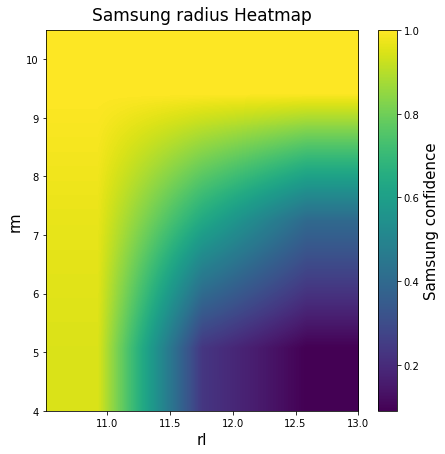

In [12]:
title="Samsung radius Heatmap"
rm=samsung_ref["rm"][0][0]#10.5
xmin=low-rm#10.6
xmax=up-rm #12
ymin=rm-up2#9.9
ymax=rm-low2#4
radius_axis=[low, up, low2, up2]
# low, up = 10.51,13
# low2, up2 = 4,10.4
gap_axis=[xmin, xmax, ymin, ymax]
plt.figure(figsize=(7, 7))
plt.imshow(plot_3d_norm, interpolation="bilinear",\
           extent=radius_axis, aspect='auto', origin='lower')
plt.xlabel("rl", fontsize=15)
plt.ylabel("rm", fontsize=15)
plt.title(title, fontsize=17, pad=10)
plt.colorbar().set_label(label="Samsung confidence", size=15)
plt.show()
# plt.imshow(avg_pred_rec, interpolation="bilinear")

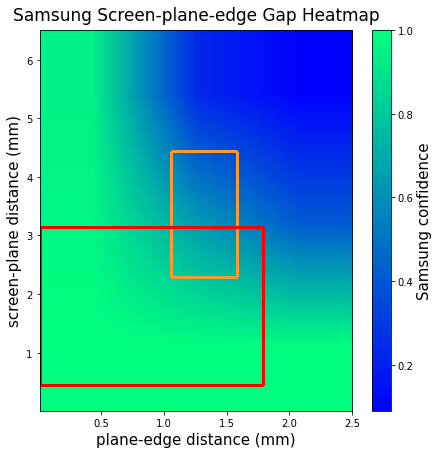

In [13]:
# x: rl->pl2edge
# y: rs->scr2pl
title="Samsung Screen-plane-edge Gap Heatmap"
rm=samsung_ref["rm"][0][0]#10.5
xmin=low-rm#10.6
xmax=up-rm #12
ymin=rm-up2#9.9
ymax=rm-low2#4
radius_axis=[low, up, low2, up2]
gap_axis=[xmin, xmax, ymin, ymax]
plt.figure(figsize=(7, 7))
plt.imshow(plot_3d_norm, interpolation="bilinear",\
           extent=gap_axis, aspect='auto', cmap="winter")
plt.xlabel("plane-edge distance (mm)", fontsize=15)
plt.ylabel("screen-plane distance (mm)", fontsize=15)
plt.colorbar().set_label(label="Samsung confidence", size=15)
plt.title(title, fontsize=17, pad=10)

xmin=1/146.15*154.55
xmax=1.5/146.15*154.55
ymin=2.17/146.15*154.55
ymax=4.2/146.15*154.55

plt.vlines(xmin, ymin, ymax, color=[1,0.6,0.2],linewidth=3)
plt.vlines(xmax, ymin, ymax, color=[1,0.6,0.2],linewidth=3)
plt.hlines(ymin, xmin, xmax, color=[1,0.6,0.2],linewidth=3)
plt.hlines(ymax, xmin, xmax, color=[1,0.6,0.2],linewidth=3)


xmin2=0.01
xmax2=8.31-6.52
ymin2=6.97-6.52
ymax2=8.03-4.89
plt.vlines(xmin2, ymin2, ymax2, color=[1,0,0],linewidth=3)
plt.vlines(xmax2, ymin2, ymax2, color=[1,0,0],linewidth=3)
plt.hlines(ymin2, xmin2, xmax2, color=[1,0,0],linewidth=3)
plt.hlines(ymax2, xmin2, xmax2, color=[1,0,0],linewidth=3)
plt.savefig("%s.jpg"%title)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

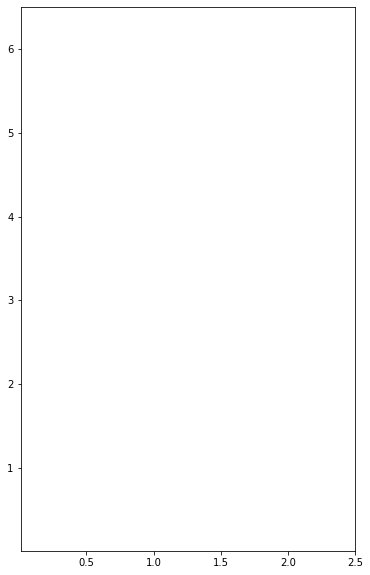

In [38]:
plt.figure(figsize=(6,10))
plt.xlim(gap_axis[:2])
plt.ylim(gap_axis[2:])
# plt.xlabel("plane-edge distance (mm)", fontsize=15)
# plt.ylabel("screen-plane distance (mm)", fontsize=15)
plt.show

In [12]:
X, Y = np.meshgrid(target_array, target_array2)

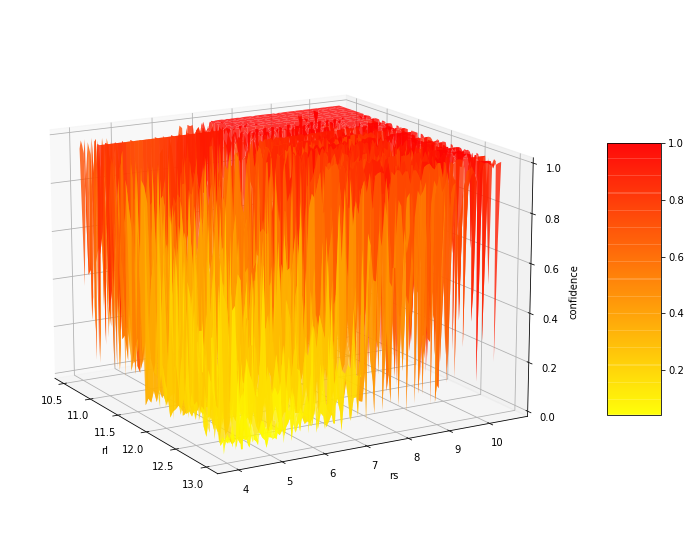

In [13]:
# avg_pred_rec.reverse()

plot_3d_norm=np.array(norm_pred_rec)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(20,10))

# ax.azim=30
# ax.elev=20
ax.azim=-30
ax.elev=15
# cm.coolwarm
surf=ax.plot_surface(X, Y,\
                plot_3d_norm, cmap="autumn_r",\
                       rstride=3, cstride=3,\
#                        linewidth=1, antialiased=False,\
                     alpha=0.8)
# surf.smooth(n_iter=10)
ax.set_xlabel('rl')
ax.set_ylabel('rs')
ax.set_zlabel('confidence')
ax.axes.set_zlim3d(bottom=0, top=1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig("3d.png")

In [14]:
gap_axis

[0.009999999999999787, 2.5, 0.009999999999999787, 6.5]

In [15]:
X.shape

(100, 100)

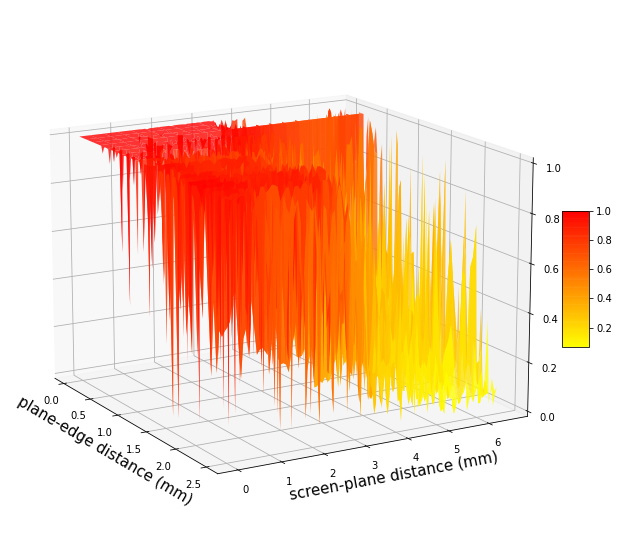

In [24]:
x2=np.linspace(gap_axis[0], gap_axis[1],100)
y2=np.linspace(gap_axis[3], gap_axis[2],100)
X2, Y2 = np.meshgrid(x2, y2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(20,10))

# ax.azim=30
# ax.elev=20
ax.azim=-30
ax.elev=15
# cm.coolwarm
surf=ax.plot_surface(X2, Y2,\
                plot_3d_norm, cmap="autumn_r",\
                       rstride=5, cstride=5,\
#                        linewidth=1, antialiased=False,\
                     alpha=0.8)
# surf.smooth(n_iter=10)
ax.set_xlabel("plane-edge distance (mm)", fontsize=15)
ax.set_ylabel("screen-plane distance (mm)", fontsize=15)
ax.set_zlabel('confidence', fontsize=15)

ax.axes.set_zlim3d(bottom=0, top=1)
fig.colorbar(surf, shrink=0.25, pad=0.01, aspect=5)
# fig.colorbar().set_label(label="Samsung confidence", size=15)
# fig.fontsize=35
plt.savefig("3d_scr2pl2edge.png")

In [26]:
u.dump_item(x2, "pl2edge.pkl")
u.dump_item(y2, "scr2pl.pkl")

In [ ]:
for i in plot_3d_norm:
    plt.plot(i)

In [ ]:
for i in range(plot_3d_norm.shape[1]):
    plt.plot(plot_3d_norm[:,i])